Import các thư viện cần thiết gồm có pandas, numpy, matplotlib, sklearn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

Thu thập dữ liệu và chọn ra các feature cần thiết (Nhiệt độ, độ ẩm, lượng mưa)

In [2]:
main_df = pd.read_csv('POWER_Point_Daily_20190101_20211231_010d7269N_106d6897E_LST.csv', skiprows=18)

main_df = main_df[['T2M', 'RH2M', 'PRECTOTCORR']] # Lấy các thuộc tính cần thiết

Chia ngưỡng lượng mưa theo các mức độ:
- Thấp: thấp hơn 6.0mm /24 giờ.
- Dưới trung bình: từ 6.0 đến dưới 16.0mm /24 giờ.
- Trung bình: từ 16.0 đến dưới 51.0mm /24 giờ.
- To: từ 51.0mm /24 giờ trở lên.

In [4]:
plist = np.array(list(main_df['PRECTOTCORR']))

newplist = []

for p in plist:
    if (p<6): newplist.append('low')
    elif (6<=p and p<16): newplist.append('<medium')
    elif (16<=p and p<50): newplist.append('medium')
    # elif (50<=p and p<100): newplist.append('high')
    else: newplist.append('high')

main_df['NEW_PRECTOTCORR'] = newplist

Lấy lại các đặc trưng một lần nữa và tách nhiệt độ và độ ẩm thành tập các features, phân loại lượng mưa thành target

In [6]:
main_df = main_df[['T2M', 'RH2M', 'NEW_PRECTOTCORR']]

X, y = np.array(main_df.iloc[:, :-1]), np.array(main_df.iloc[:, -1])

# X: tập các feature, y: Target

Sử dụng giải thuật KNN, cho k chạy từ 1 đến 99, dùng cross validation để kiểm tra độ chính xác của từng k trong giải thuật KNN

C:\Users\AN515\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\AN515\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\AN515\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\AN515\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\AN515\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.

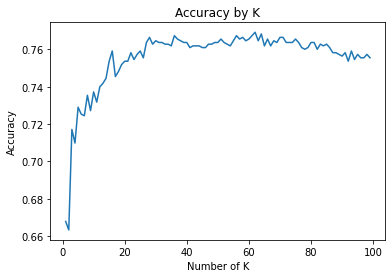

In [8]:
y_list_for_knn = []

for k in range(1 ,100):

    knn = KNeighborsClassifier(n_neighbors=k)

    cv_result = cross_val_score(knn, X, y, cv = 5)

    # print(np.mean(cv_result))
    y_list_for_knn.append(np.mean(cv_result))

# Với cv = 5, acuracy cao nhất khi (k=62): 76.9161%

plt.plot(range(1,100), y_list_for_knn)

plt.xlabel('Number of K')
plt.ylabel("Accuracy")
plt.title("Accuracy by K")

plt.show()

Nhận thấy k bằng 62 cho độ chính xác cao nhất (76.9161%), nên ta chọn k = 62 cho model